In [3]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-stiffness-explicit)

The `BDF` solver is good for stiff problems and needs few time steps to solve the Oregonator from {numref}`Demo {number} <demo-stiffness-oregon>`.

In [9]:
from scipy.integrate import solve_ivp
q, s, w = (8.375e-6, 77.27, 0.161)

def ode(t, u):
    return array(
        [
            s * (u[1] - u[0] * u[1] + u[0] - q * u[0]**2),
            (-u[1] - u[0] * u[1] + u[2]) / s,
            w * (u[0] - u[2]),
        ]
    )

J = lambda u: array(
    [
        [-s * (u[1] + 1 - 2 * q * u[0]), s * (1 - u[0]), 0],
        [-u[1] / s, (-1 - u[0]) / s, 1 / s],
        [w, 0, -w],
    ]
)

u0 = array([1.0, 2.0, 3.0])

In [5]:
tspan = (0, 25)
start = timer()
sol = solve_ivp(ode, tspan, u0, method="BDF")
print(f"stiff solver took {timer() - start:.3f} seconds with {len(sol.t) - 1} time steps")

stiff solver took 0.023 seconds with 198 time steps


But if we apply {numref}`Function {number} <function-rk23>` to the problem, the step size will be made small enough to cope with the large negative eigenvalue.

In [6]:
start = timer()
t, u = FNC.rk23(ode, tspan, u0, 1e-6)
print(f"rk23 solver took {timer() - start:.3f} seconds with {len(t) - 1} time steps")

rk23 solver took 1.070 seconds with 21388 time steps


Starting from the eigenvalues of the Jacobian matrix, we can find an effective $\zeta(t)$ by multiplying with the local time step size. The values of $\zeta(t)$ for each time level are plotted below and color coded by component of the diagonalized system.

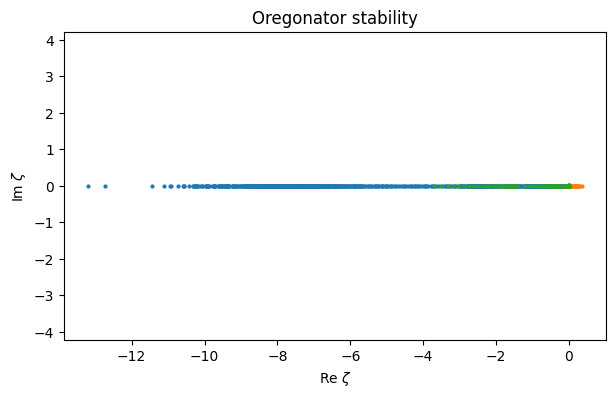

In [10]:
from numpy.linalg import eigvals
zeta = zeros([len(t)- 1, 3]) + 0j    # complex array
for i in range(len(t) - 1):
    dt = t[i+1] - t[i]
    lamb = eigvals(J(u[:, i]))
    zeta[i] = lamb * dt
plot(real(zeta), imag(zeta), ".")
axis("equal")
xlabel("Re $\\zeta$")
ylabel("Im $\\zeta$")
title("Oregonator stability");

Roughly speaking, the $\zeta$ values stay within or close to the RK2 stability region in {numref}`figure-stabreg_bd_rk`. Momentary departures from the region are possible, but time stepping repeatedly in that situation would cause instability.